# INDIA START-UP FUNDING DATA ANALYSIS

## Project Description

This project seeks to gain insight into the fundings received by start-ups companies in India between 2018 and 2021. And advice a team trying to venture into the Indian start-up ecosystem, by proposing the best course of action. This would be done by developing a unique story from this dataset, stating and testing a hypothesis, asking questions, perform analysis and share insights with relevant visualisations.

## Business Understanding 

Start-up funding plays a crucial role providing essential capital to nurture new ventures that drive economic growth and technological advancement.Indian startups ecosystem span across various sectors and domains, such as e-commerce, fintech, edtech, healthtech, and agritech. This project aims to equip the team with the knowledge and strategic insights on identifying the most promising sectors, cities, funding trends, and key players necessary to make informed decisions and successfully engage with the dynamic and rapidly evolving Indian start-up landscape.

## Data understanding
 
The datasets contains information about startup funding from 2018 to 2021. It includes various attributes such as the company’s name, sector, funding amount, stage, investor details, and location.
 
The key attributes in the dataset include:
 
**Company/Brand**: Name of the company/start-up
 
**Founded**: Year start-up was founded
 
**Sector**: Sector of service
 
**What it does**: Description about Company
 
**Founders**: Founders of the Company
 
**Investor**: Investors
 
**Amount($)**: Raised fund
 
**Stage**: Round of funding reached
 
**Headquarters**: Location of   the start-up_company

## Hypothesis
 
Null Hypothesis (H0): Funding to start-ups is spread across different locations and sectors.
 
Alternative Hypothesis (H1): Funding to start-ups is centralized around specific locations and sectors.
 
 
 
## RESEARCH QUESTIONS
 
1.How has funding to startups changed over the period of time?
 
2.What is the average amount of funding for start-ups in 2019 and 2021?
 
3.Which headquarter is the most preferred startup location?
 
4.Which sectors are most favoured by investors?
 
5.What are the most common funding stages among indian startups?

## Import Packages

In [1]:
import pyodbc 
from dotenv import dotenv_values    
import pandas as pd
import warnings 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Ignore warning due to depreciating packages
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# Load environment variables from .env file
environment_variables = dotenv_values('.env')

# Get the values for the credentials in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("Login")
password = environment_variables.get("password")

In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the pyodbc library to pass in the connection string
connection = pyodbc.connect(connection_string)

In [5]:
# Accessing 2021 data from the database
query = "SELECT * FROM dbo.LP1_startup_funding2021"

data_2021 = pd.read_sql(query, connection)

data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [6]:
# Accessing 2020 data from the database
query = "SELECT * FROM dbo.LP1_startup_funding2020"

data_2020 = pd.read_sql(query, connection)

data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [7]:
# Accessing a csv file containing 2019 data 
data_2019 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\Indian_start-up_ecosystem\data\startup_funding2019.csv")

data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [8]:
# Accessing a csv file containing 2018 data 
data_2018 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\Indian_start-up_ecosystem\data\startup_funding2018.csv")

data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


#  Data Inspection

In [9]:
data_2021.shape

(1209, 9)

In [10]:
data_2020.shape

(1055, 10)

In [11]:
data_2019.shape

(89, 9)

In [12]:
data_2018.shape

(526, 6)

#### Checking the datatype the number of columns of the four datasets

In [13]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [14]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [15]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [16]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


#### Check for null values

In [17]:
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [18]:
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [19]:
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [20]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

#### After careful analysis **"column10"** is dropped because it contains no values

In [21]:
# Drop the empty column "column10" in data_2020
data_2020_1 = data_2020.drop(["column10"],axis=1,inplace=True)

In [22]:
#  Check the shape of the data
data_2020.shape

(1055, 9)

#### Exploring the Industry column of data_2018

In [23]:
# Split the 'Industry' column into multiple columns
split_columns = data_2018['Industry'].str.split(',', expand=True)

In [24]:
# Determine the number of resulting columns
num_columns = split_columns.shape[1]
# Print the number of resulting columns
num_columns

12

In [25]:
# Assign new column names based on the maximum number of columns obtained
new_column_names = ['Part1', 'Part2', 'Part3', 'Part4', 'Part5', 'Part6', 'Part7', 'Part8', 'Part9', 'Part10', 'Part11', 'Part12'][:num_columns]
data_2018[new_column_names] = split_columns

In [26]:
# Check the number of columns obtained
split_columns

,0,1,2,3,4,5,6,7,8,9,10,11
0,Brand Marketing,Event Promotion,Marketing,Sponsorship,Ticketing,None,None,None,None,None,None,None
1,Agriculture,Farming,None,None,None,None,None,None,None,None,None,None
2,Credit,Financial Services,Lending,Marketplace,None,None,None,None,None,None,None,None
3,Financial Services,FinTech,None,None,None,None,None,None,None,None,None,None
4,E-Commerce Platforms,Retail,SaaS,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
521,B2B,Business Development,Internet,Marketplace,None,None,None,None,None,None,None,None
522,Tourism,Travel,None,None,None,None,None,None,None,None,None,None
523,Food and Beverage,Food Delivery,Internet,None,None,None,None,None,None,None,None,None
524,Information Technology,None,None,None,None,None,None,None,None,None,None,None


In [27]:
# Check for null values in the selected column 
split_columns[0].isnull().any()

np.False_

In [28]:
# Choose one of the new columns to replace the original column
data_2018['Industry'] = data_2018['Part1']

In [29]:
# Check if the replacement worked
data_2018['Industry'].isnull().any()

np.False_

In [30]:
# Drop the rest of the split columns since they are not needed
data_2018.drop(columns=new_column_names, inplace=True)

# Display the updated DataFrame
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,Brand Marketing,Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,Tourism,Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,Food and Beverage,Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


# Data Cleaning

#### Exploring the Location column of data_2018

In [31]:
# Split the 'Location' column into multiple columns
split_columns = data_2018['Location'].str.split(',', expand=True)

In [32]:

# Assign the new columns to the DataFrame with appropriate names
data_2018[['City', 'State', 'Country']] = split_columns

In [33]:
# Replace the original column with one of the new columns
data_2018['Location'] = data_2018['City']

In [34]:
# Check if there any null values in the column
data_2018['Location'].isnull().any()

np.False_

In [35]:
# Drop the temporary columns if they are not needed
data_2018.drop(columns=['City', 'State', 'Country'], inplace=True)

In [36]:
# Add 'Funding_Year' column to all datasets 
data_2021["Funding_Year"] = 2021
data_2020["Funding_Year"] = 2020
data_2019["Funding_Year"] = 2019
data_2018["Funding_Year"] = 2018

In [37]:
# Rename columns for consistency
data_2021.rename(columns={"Company_Brand": "CompanyName", "Amount": "Fund_Amount"}, inplace=True)
data_2020.rename(columns={"Company_Brand": "CompanyName", "Amount": "Fund_Amount"}, inplace=True)
data_2019.rename(columns={"Company/Brand": "CompanyName", "Amount($)": "Fund_Amount", "What it does": "What_it_does"}, inplace=True)
data_2018.rename(columns={"Company Name": "CompanyName", "Amount": "Fund_Amount", "Industry": "Sector", "Round/Series": "Stage", "Location": "HeadQuarter", "About Company": "What_it_does"}, inplace=True)

In [38]:
# Add missing columns in data_2018 for consistency
data_2018['Founders'] = np.nan
data_2018['Investor'] = np.nan
data_2018['Founded'] = np.nan

In [39]:
# Close the database connection
connection.close()

## Data Preparation 

In [40]:
# Merge all datasets into one
joined_data = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)


In [41]:

# save to CSV
joined_data.to_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\Indian_start-up_ecosystem\data\joined_data.csv", index=False)

In [42]:
# Load the combined data
combined21_18 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\Indian_start-up_ecosystem\data\joined_data.csv")

In [43]:
# Check for columns with null rows
print(combined21_18.isnull().sum())

CompanyName       0
Sector           18
Stage           938
Fund_Amount     257
HeadQuarter     114
What_it_does      0
Funding_Year      0
Founders        545
Investor        626
Founded         769
dtype: int64


In [44]:
# Calculate the percentage of missing rows
total_rows = len(combined21_18)
missing_rows = combined21_18.isnull().any(axis=1).sum()
missing_percentage = (missing_rows / total_rows) * 100
print(f"Percentage of missing rows: {missing_percentage:.2f}%")

Percentage of missing rows: 61.38%


In [45]:
# Filter the rows where 'Stage' column starts with 'https://'
rows_to_drop = combined21_18[combined21_18['Stage'].str.startswith('https://', na=False)].index

# Drop the rows
combined21_18.drop(rows_to_drop, inplace=True)

# Verify if the rows are dropped
print(combined21_18['Stage'].str.startswith('https://').sum())


0


##  Handling Missing Values

#### The Fund_Amount column

In [46]:
# Replace non-numeric values in "Fund_Amount" with NaN
combined21_18["Fund_Amount"] = combined21_18["Fund_Amount"].replace(['Undisclosed', '$Undisclosed', '—', '-'], np.nan)

# Define exchange rates from INR to USD for each year
exchange_rates = {2018: 0.0146, 2019: 0.0142, 2020: 0.0135, 2021: 0.0135}

# Define the conversion function
def convert_currency(row):
    amount = row["Fund_Amount"]
    year = row["Funding_Year"]
    
    if pd.isna(amount):
        return np.nan
    amount = str(amount)
    
    if "₹" in amount:
        cleaned_amount = amount.replace("₹", "").replace(",", "")
        return float(cleaned_amount) * exchange_rates[year] if cleaned_amount.isdigit() else np.nan
    elif "$" in amount:
        cleaned_amount = amount.replace("$", "").replace(",", "")
        return float(cleaned_amount) if cleaned_amount.isdigit() else np.nan
    else:
        cleaned_amount = amount.replace(",", "")
        return float(cleaned_amount) if cleaned_amount.isdigit() else np.nan

# Apply the conversion function to the "Fund_Amount" column
combined21_18["Fund_Amount"] = combined21_18.apply(convert_currency, axis=1)

# Fill NaN values in the "Fund_Amount" column with the median
combined21_18["Fund_Amount"].fillna(combined21_18["Fund_Amount"].median(), inplace=True)


#### The sector column


In [47]:
# Fill missing values, strings, and symbols with "Unknown"
combined21_18["Sector"] = combined21_18["Sector"].fillna("Unknown").replace({"": "Unknown", "—": "Unknown"})

In [48]:
# display option to show all rows
pd.set_option('display.max_rows', None)

In [49]:
# Inspect the unique values and their count in the Sector column
sector_counts = combined21_18['Sector'].value_counts()
sector_counts

Sector
FinTech                                                                                                                                       175
EdTech                                                                                                                                        148
Financial Services                                                                                                                             88
Fintech                                                                                                                                        85
Edtech                                                                                                                                         74
E-commerce                                                                                                                                     73
Automotive                                                                                                           

In [50]:
# List unique values in the Sector column
combined21_18['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'Unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mo

we venture into mapping because there are too many sectors wrongly or poorly classified with irregularities in the column.

In [51]:
# Define the sector mapping to the given categories
sector_mapping = {
    'Financial Services': [
        'FinTech', 'Fintech', 'Crowdfunding', 'Cryptocurrency', 'Mutual Funds',
        'Virtual Banking', 'Escrow', 'Insurance technology', 'InsureTech',
        'Insurtech', 'Investment Management', 'Venture Capital', 'VC',
        'Investment Banking', 'Trading platform', 'Investment Tech',
        'Investment', 'Venture Capital & Private Equity', 'Online financial service',
        'Equity Management', 'Neo-banking'
    ],
    'E-commerce': [
        'E-Commerce Platforms', 'E-Commerce', 'Ecommerce', 'E-marketplace', 'Online Portals',
        'Online Media', 'E store', 'E-market', 'Online storytelling', 'Ecommerce',
        'E-marketplace'
    ],
    'Automotive': [
        'Automotive tech', 'Automobile', 'Automobile & Technology', 'EV startup', 'Automotive and Rentals',
        'Automobile Technology', 'Car Service', 'Bike Rental', 'Vehicle repair startup'
    ],
    'Logistics': [
        'Logistics', 'TransportTech', 'Delivery', 'Delivery Service', 'Last Mile Transportation',
        'Transport & Rentals', 'Transport', 'Mobility tech', 'Mobility', 'Auto-tech',
        'Automotive tech', 'Automobile & Technology', 'Warehouse', 'Automotive and Rentals'
    ],
    'Information Technology & Services': [
        'IT', 'IT startup', 'IT company', 'Information Technology & Services', 'Computer software', 
        'Computer Software', 'Computer Games', 'Software', 'Software Company', 'Software Startup', 
        'Tech startup', 'Digital platform', 'Technology platform', 'Digital tech', 'Data Intelligence'
    ],
    'Healthcare': [
        'Medical', 'Health', 'Healthcare', 'HealthTech', 'Healthtech', 'Medtech',
        'Med Tech', 'Biopharma', 'Pharmaceutical', 'Pharma', 'Fertility tech',
        'Fitness startup', 'Health & Wellness', 'Health care', 'Health Insurance',
        'HealthTech', 'Nutrition sector', 'Sanitation solutions', 'Ayurveda tech',
        'Dental', 'Mental Health', 'Yoga & wellness', 'Alternative Medicine',
        'Biotechnology company', 'Biotech', 'BioTech', 'MedTech', 'Nutrition Tech',
        'Medical Device', 'Dietary Supplements', 'Fertility tech'
    ],
    'Media': [
        'News', 'Media', 'FM', 'Publication', 'Podcast', 'Celebrity Engagement', 'Digital platform',
        'Content publishing', 'Content creation', 'Augmented reality', 'OTT', 'Social platform'
    ],
    'Retail': [
        'RetailTech', 'Retail', 'Cosmetics', 'Eyewear', 'Fashion startup', 'Jewellery startup',
        'Retail startup', 'Jewellery', 'Fashion & Lifestyle', 'Skincare startup', 'Luxury car startup',
        'Beauty products', 'Personal care startup', 'Retail Aggregator', 'Textiles',
        'Consumer goods', 'Apparel & Fashion', 'Eyeglasses', 'Consumer Services',
        'Furniture', 'Consumer appliances', 'Consumer software', 'B2B E-commerce'
    ],
    'Education': [
        'EdTech', 'E-learning', 'EduTech', 'Education Management', 'Online Media', 'Online storytelling', 'Preschool Daycare'
    ],
    'Agriculture': [
        'Agritech', 'AgriTech', 'Agri tech', 'AgriTech & Food', 'Soil-Tech', 'Agritech/Commerce', 'B2B Agritech', 'Farming'
    ],
    'Health, Wellness & Fitness': [
        'Health', 'Healthcare', 'Fitness startup', 'HealthTech', 'Yoga & wellness', 'Health Insurance', 'Health & Wellness',
        'Nutrition Tech', 'Medical Device', 'Fertility tech'
    ],
    'Logistics & Supply Chain': [
        'Logistics', 'TransportTech', 'Delivery', 'Last Mile Transportation', 'Transport & Rentals', 'Transport',
        'Mobility tech', 'Warehouse', 'Automotive and Rentals', 'Supply chain platform'
    ],
    'Entertainment': [
        'Gaming', 'Music Streaming', 'Music', 'Online Games', 'eSports', 'Fantasy Sports',
        'Video platform', 'Video sharing platform', 'Video streaming platform', 'Video'
    ],
    'Real Estate': [
        'Real Estate', 'Commercial Real Estate', 'Proptech', 'Co-working', 'Co-working Startup', 'Rental space', 'Housing Marketplace'
    ],
    'Hospital & Health Care': [
        'Hospital & Health Care', 'Health care', 'HealthTech', 'MedTech', 'Medical', 'Pharmaceutical', 'Health Insurance',
        'Biopharma', 'Health, Wellness & Fitness', 'Sanitation solutions', 'Fertility tech'
    ],
    'Computer software': [
        'IT startup', 'Computer software', 'Software Company', 'Tech startup', 'Software Startup', 'Digital platform',
        'Technology platform', 'Software', 'Computer Software', 'Software Startup'
    ]
}

# Reverse the dictionary to map sectors to their corresponding categories
sector_reverse_mapping = {v: k for k, values in sector_mapping.items() for v in values}

# Apply the mapping
combined21_18['Sector'] = combined21_18['Sector'].map(sector_reverse_mapping)

# classify remaining sectors into 'Unknown'
combined21_18['Sector'] = combined21_18['Sector'].fillna('Unknown')

# Display the sector counts
combined21_18['Sector'].value_counts()


Sector
Unknown                              1715
Financial Services                    291
Education                             182
Retail                                 83
Agriculture                            73
Hospital & Health Care                 70
Health, Wellness & Fitness             55
Logistics & Supply Chain               54
E-commerce                             53
Computer software                      51
Information Technology & Services      51
Healthcare                             49
Entertainment                          49
Media                                  39
Real Estate                            26
Automotive                             22
Logistics                              15
Name: count, dtype: int64

In [52]:
# Check for null values in the sector column
combined21_18['Sector'].isnull().sum()

np.int64(0)

### The stage column

In [53]:
# Fill missing values in the "Stage" column with "Unknown"
combined21_18["Stage"] = combined21_18["Stage"].fillna("Unknown").replace("", "Unknown")

In [54]:
# List all unique funding stages in the dataset
combined21_18['Stage'].unique()


array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round', 'Unknown', 'Fresh funding', 'Pre series A',
       'Series G', 'Post series A', 'Seed funding', 'Seed fund',
       'Series F', 'Series B+', 'Seed round', 'Pre-series A', 'Pre-seed',
       'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B', 'Bridge',
       'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',

- We will have to result to mapping if we want the right stages in the stage column

List of funding stages **;**


Pre-seed,
Seed,
Series A,
Series B,
Series C,
Series D,
IPO.

In [55]:
# Define the mapping for stages
stage_mapping = {
    'Pre-seed': [
        'Pre-Seed', 'Pre-seed', 'Pre-seed Round', 'Pre seed Round', 'Pre seed round', 'Early seed', 
        'Pre series A', 'Pre-series A', 'Pre-Series A', 'Pre series A1', 'Pre-series A1', 'Pre series A', 
        'Pre series A1', 'Pre- series A', 'Pre-Series B', 'Pre-series B', 'Pre-Series C', 'Pre-series C', 
        'Pre-series', 'Pre seed Round'
    ],
    'Seed': [
        'Seed', 'Seed round', 'Seed Round', 'Seed funding', 'Seed fund', 'Seed Funding', 'Seed Investment', 
        'Seed A', 'Seed+', 'Seed Round & Series A'
    ],
    'Series A': [
        'Series A', 'Series A-1', 'Series A1', 'Series A+', 'Seies A', 'Series A2'
    ],
    'Series B': [
        'Series B', 'Series B+', 'Series B2', 'Series B3'
    ],
    'Series C': [
        'Series C', 'Series C, D'
    ],
    'Series D': [
        'Series D', 'Series D1'
    ],
    'IPO': [
        'Post-IPO Debt', 'Post-IPO Equity'
    ],
    'Unknown': [
        'Private Equity', 'Venture - Series Unknown', 'Grant', 'Debt Financing', 'Series H', 'Series E', 
        'Corporate Round', 'Undisclosed', 'Secondary Market', 'Non-equity Assistance', 'Funding Round', 
        'Unknown', 'Fresh funding', 'Post series A', 'Series G', 'Seed funding', 'Series F', 'Debt', 
        'Bridge', 'Edge', 'Series E2', 'Bridge Round', 'Series F2', 'Series B3', 'PE', 'Series F1', 
        '$300000', 'Early seed', '$6000000', '$1000000', 'Series I'
    ]
}

# Reverse the dictionary to map stages to their corresponding categories
stage_reverse_mapping = {v: k for k, values in stage_mapping.items() for v in values}

In [56]:
# Apply the mapping to the Stage column
combined21_18['Stage'] = combined21_18['Stage'].map(stage_reverse_mapping).fillna('Unknown')

# Verify the results
combined21_18['Stage'].value_counts()


Stage
Unknown     1195
Seed         692
Pre-seed     373
Series A     309
Series B     137
Series C     115
Series D      52
IPO            5
Name: count, dtype: int64

In [57]:
# Check unique funding stages
combined21_18['Stage'].unique()

array(['Seed', 'Series A', 'Unknown', 'Series B', 'Pre-seed', 'IPO',
       'Series C', 'Series D'], dtype=object)

#### The HeadQuarter column

In [58]:
# Fill missing values in the "HeadQuarter" column with the most common category
most_common_headquarter = combined21_18["HeadQuarter"].mode()[0]
combined21_18["HeadQuarter"].fillna(most_common_headquarter, inplace=True)

## Export Cleaned Data

In [59]:
# Export cleaned data to a CSV file
combined21_18.to_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\Indian_start-up_ecosystem\data\clean_data.csv", index=False)

# Exploratory Data Analysis (EDA)

In [60]:
# Summary statistics for numerical columns
combined21_18.describe().T


,count,mean,std,min,25%,50%,75%,max
Fund_Amount,2878.0,6.737096e+07,2.796429e+09,876.0,2500000.0,3000000.0,3230000.0,1.500000e+11
Funding_Year,2878.0,2.020024e+03,1.086508e+00,2018.0,2020.0,2020.0,2021.0,2.021000e+03
Founded,2110.0,2.016080e+03,4.368006e+00,1963.0,2015.0,2017.0,2019.0,2.021000e+03


In [61]:

# Summary statistics for categorical columns
combined21_18.describe(include=['object']).T


,count,unique,top,freq
CompanyName,2878,2213,BharatPe,10
Sector,2878,17,Unknown,1715
Stage,2878,8,Unknown,1195
HeadQuarter,2878,141,Bangalore,979
What_it_does,2878,2690,Provides online learning classes,5
Founders,2334,1980,Byju Raveendran,7
Investor,2253,1777,Inflection Point Ventures,36


#### what did we get from the summary statistics?
Provided insights into the central tendency (mean, median) and dispersion (standard deviation, min, max) of the numerical variables.

Helped to identify the presence of any anomalies or outliers

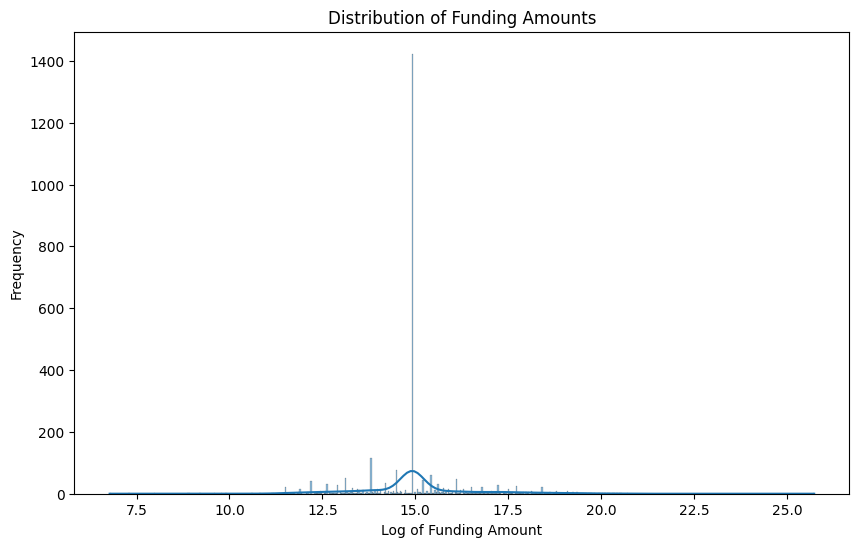

In [62]:

# Distribution of Funding Amounts with log transformation
plt.figure(figsize=(10, 6))
# Apply log transformation to the 'Fund_Amount' column to handle skewness
log_fund_amount = np.log1p(combined21_18['Fund_Amount'])

sns.histplot(log_fund_amount, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Log of Funding Amount')
plt.ylabel('Frequency')
plt.show()


#### What did we get from visualizing the funding amount?
The distribution was right-skewed, indicating a few very high funding amounts.

Applying a log transformation provided a clearer view of the distribution, helping to normalize the data for better analysis.

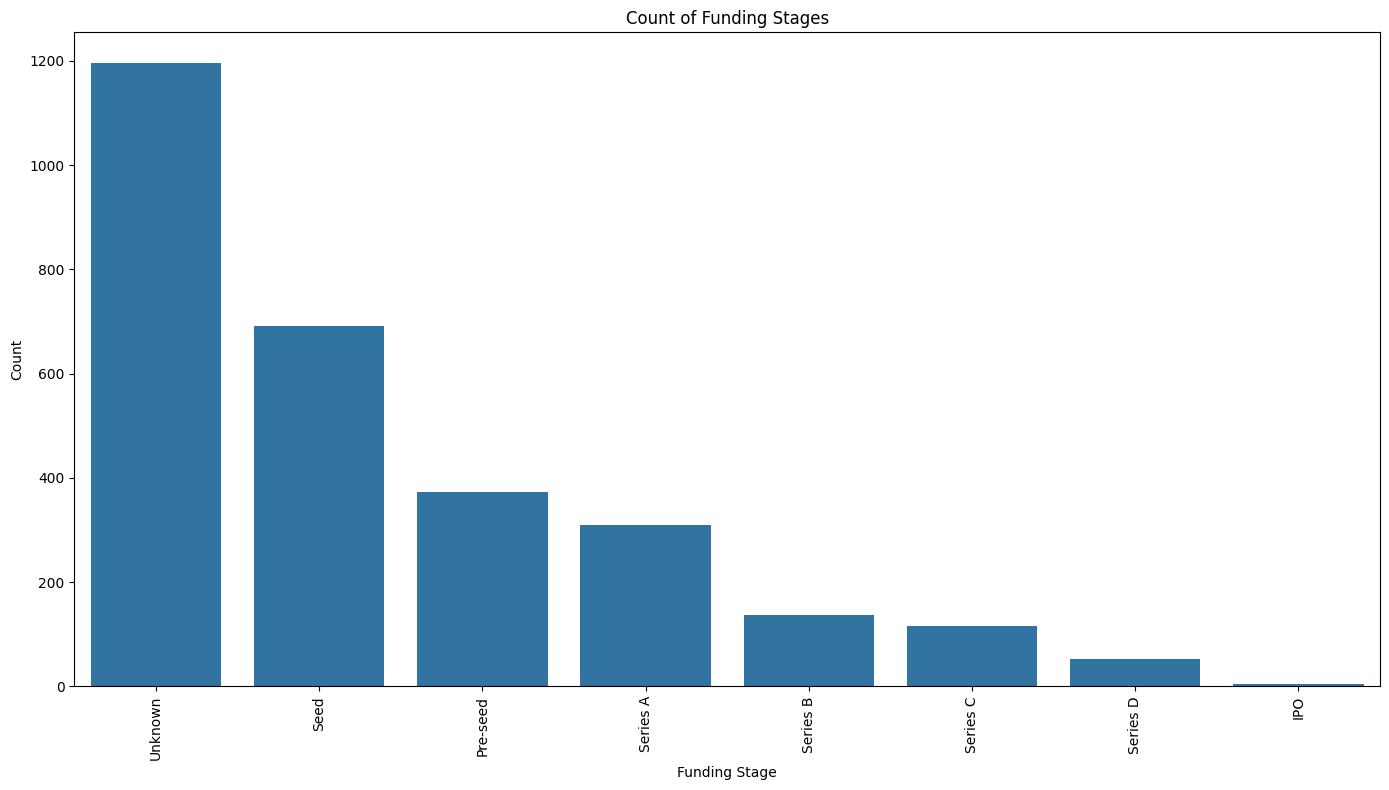

In [63]:
# Count plot for Funding Stages
plt.figure(figsize=(14, 8))  
sns.countplot(data=combined21_18, x='Stage', order=combined21_18['Stage'].value_counts().index)
plt.title('Count of Funding Stages')
plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


#### What did we get from visualizing the funding stage ?

The purpose of this analysis is to visualize the distribution of startups across different funding stages. 

The plot reveals which funding stages (e.g., Seed, Series A) are most prevalent among the startups.

It helps in understanding the startup ecosystem's maturity, identifying trends, and making data-driven decisions for investment and support strategies.

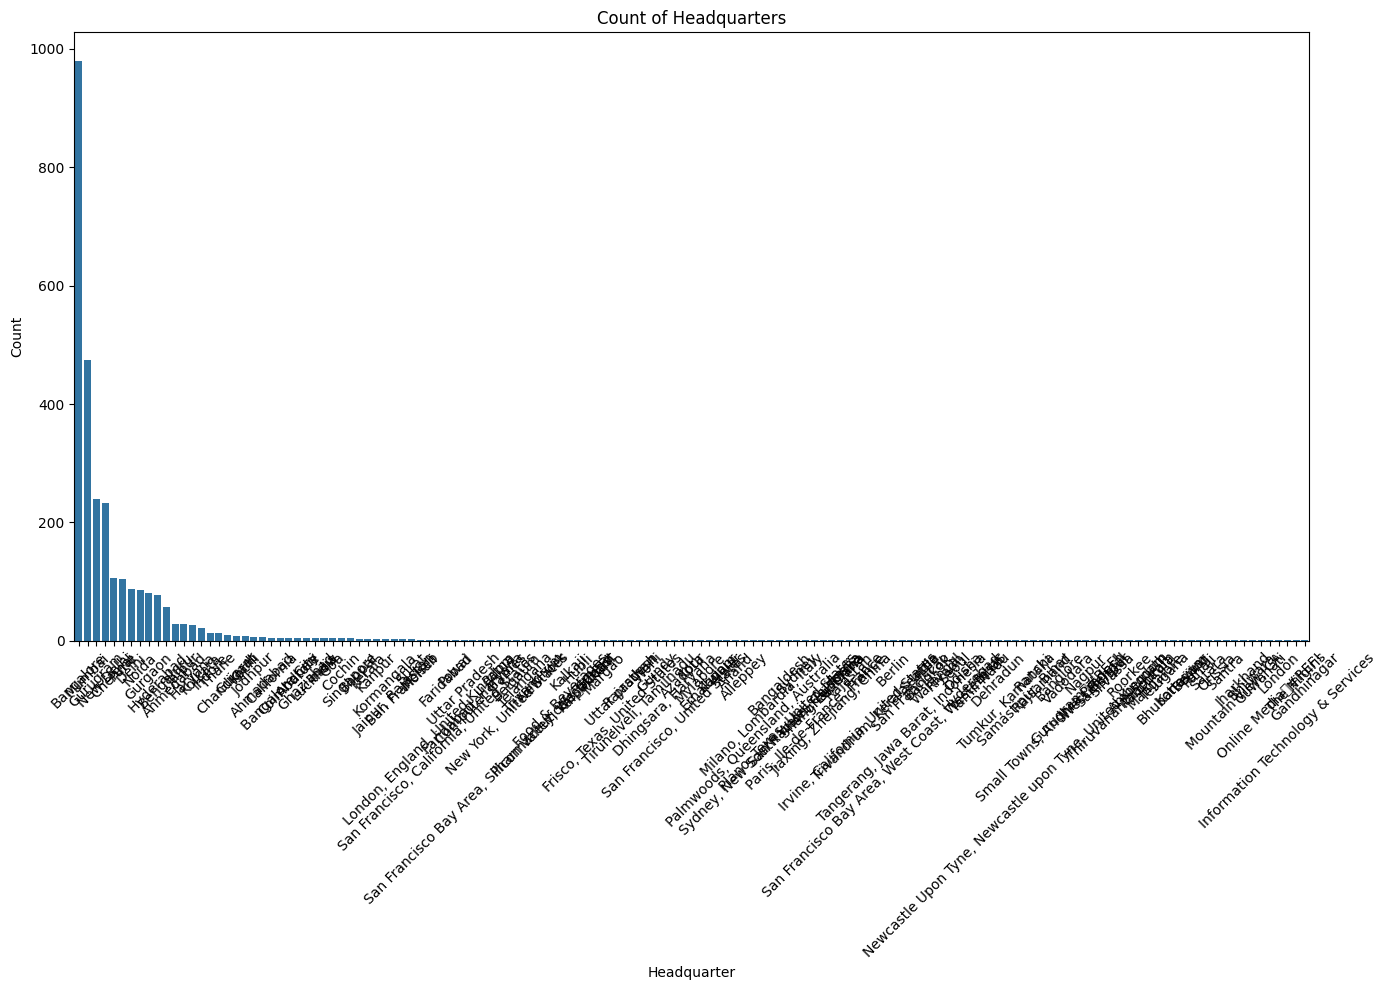

In [64]:
# Count plot for aggregated Headquarters
plt.figure(figsize=(14, 10))  
sns.countplot(data=combined21_18, x='HeadQuarter', order=combined21_18['HeadQuarter'].value_counts().index)
plt.title('Count of Headquarters')
plt.xlabel('Headquarter')
plt.ylabel('Count')
plt.xticks(rotation=45)     #rotate  X-labels for readability  
plt.tight_layout() 
plt.show()



#### What do we get from visualizing the distribution of startups across different headquarters 
providing valuable insights into the geographical distribution of startups. By aggregating less frequent categories, the plot becomes more focused and easier to interpret, highlighting the major startup hubs in India. 
This information is crucial for stakeholders to understand regional trends and make informed decisions regarding investments and support strategies.

# Hypothesis Testing

In [65]:
# Group by HeadQuarter and get the funding amounts
funding_groups = [group['Fund_Amount'].values for name, group in combined21_18.groupby('HeadQuarter')]

# Perform ANOVA
anova_result = f_oneway(*funding_groups)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: No significant difference in funding amounts across different headquarters.")
else:
    print("Fail to reject the null hypothesis: There is a significant difference in funding amounts across different headquarters.")


ANOVA result: F-statistic = 0.034601167939555554, p-value = 0.9999999999999999
Fail to reject the null hypothesis: There is a significant difference in funding amounts across different headquarters.


# Data Visualization

#### Top 10 Headquarters by Funding Amount

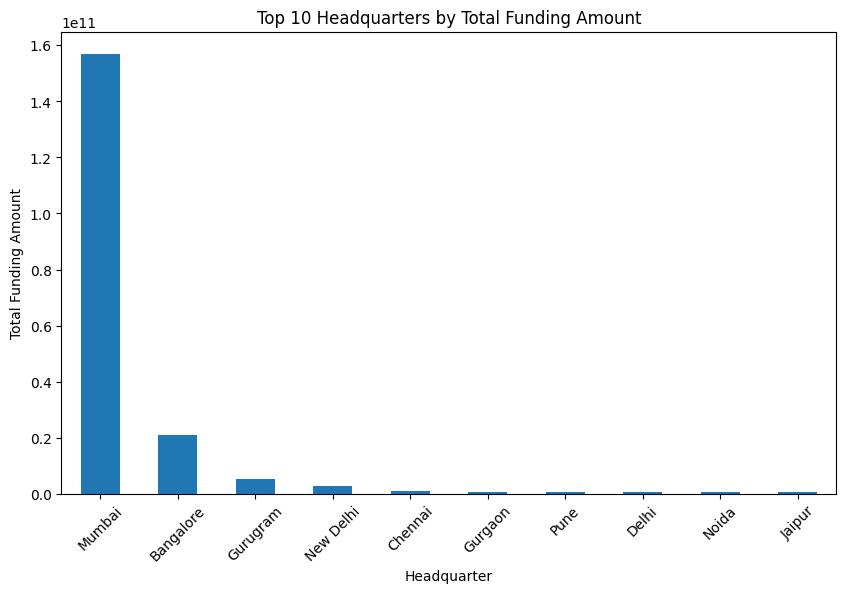

In [66]:
top_headquarters = combined21_18.groupby('HeadQuarter')['Fund_Amount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_headquarters.plot(kind='bar')
plt.title('Top 10 Headquarters by Total Funding Amount')
plt.xlabel('Headquarter')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()



# Answering the questions asked 

#### 1.How has funding to startups changed over the period of time?

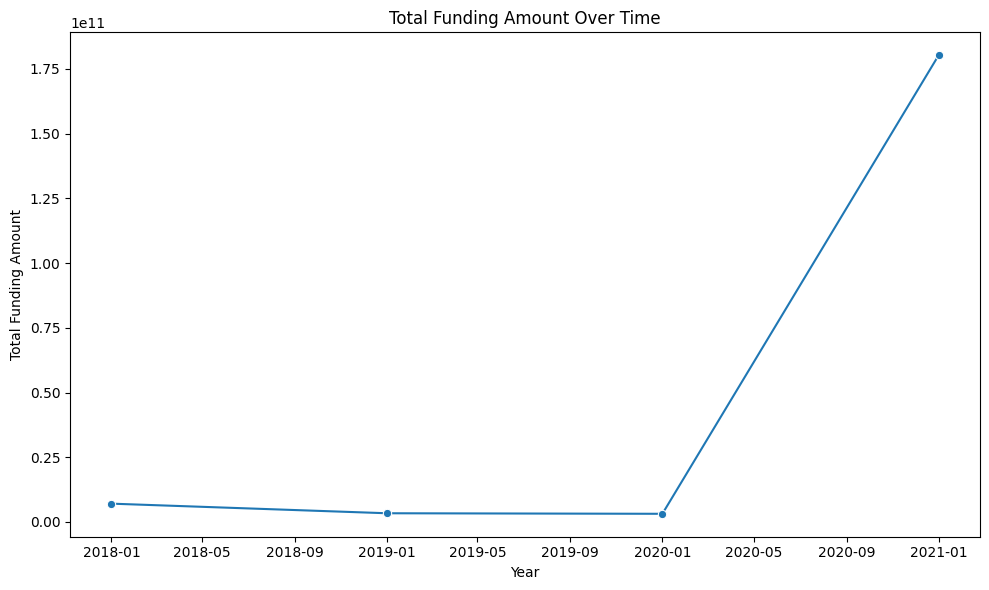

In [67]:
# First change the datatype of the Funding year.
combined21_18["Funding_Year"] = pd.to_datetime(combined21_18["Funding_Year"], format='%Y')

# Group by 'Funding_Year' and calculate the total funding amount per year
funding_by_year = combined21_18.groupby('Funding_Year')['Fund_Amount'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=funding_by_year, x='Funding_Year', y='Fund_Amount', marker='o')
plt.title('Total Funding Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.grid(False)  # Remove the gridlines
plt.tight_layout()
plt.show()


#### 2.What is the average amount of funding for start-ups in 2019 and 2021?


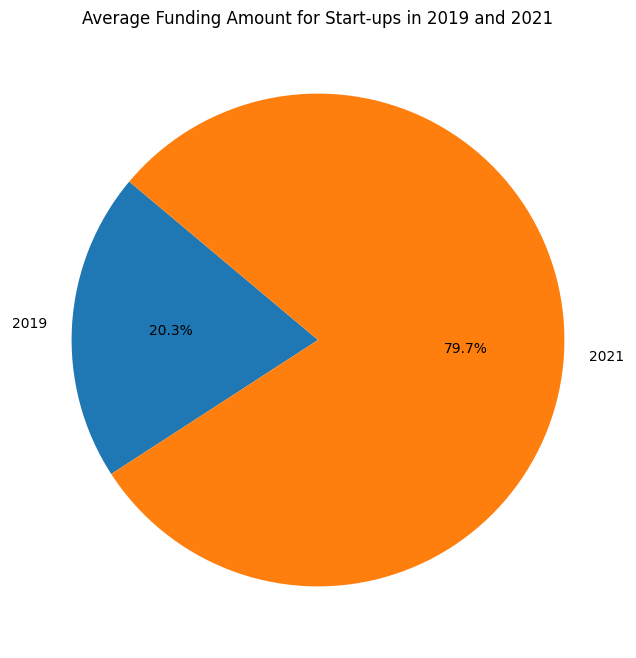

In [68]:
# Convert the Funding_Year column to datetime and extract the year
combined21_18['Funding_Year'] = pd.to_datetime(combined21_18['Funding_Year']).dt.year

# Filter the data for the years 2019 and 2021
filtered_data = combined21_18[combined21_18['Funding_Year'].isin([2019, 2021])]

# Calculate the average funding amount for each year
average_funding = filtered_data.groupby('Funding_Year')['Fund_Amount'].mean().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_funding['Fund_Amount'], labels=average_funding['Funding_Year'], autopct='%1.1f%%', startangle=140)
plt.title('Average Funding Amount for Start-ups in 2019 and 2021')
plt.show()


#### 3.Which headquarter is the most preferred startup location?


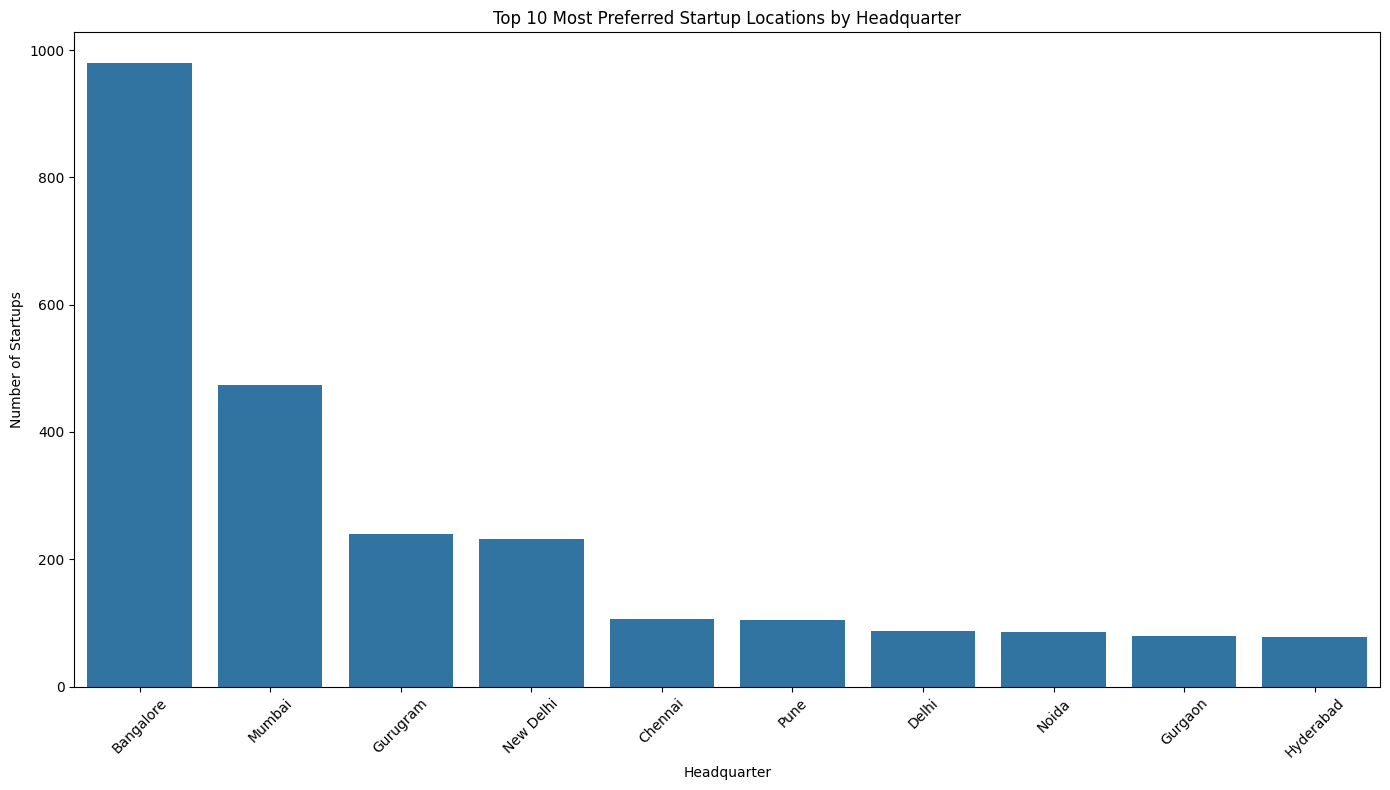

In [69]:
# Count the number of startups by headquarter
headquarter_counts = combined21_18['HeadQuarter'].value_counts().reset_index()
headquarter_counts.columns = ['HeadQuarter', 'Count']

# Filter to top 10 headquarters
top_10_headquarters = headquarter_counts.head(10)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_headquarters, x='HeadQuarter', y='Count')
plt.title('Top 10 Most Preferred Startup Locations by Headquarter')
plt.xlabel('Headquarter')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#### 4.Which sectors are most favored by investors?


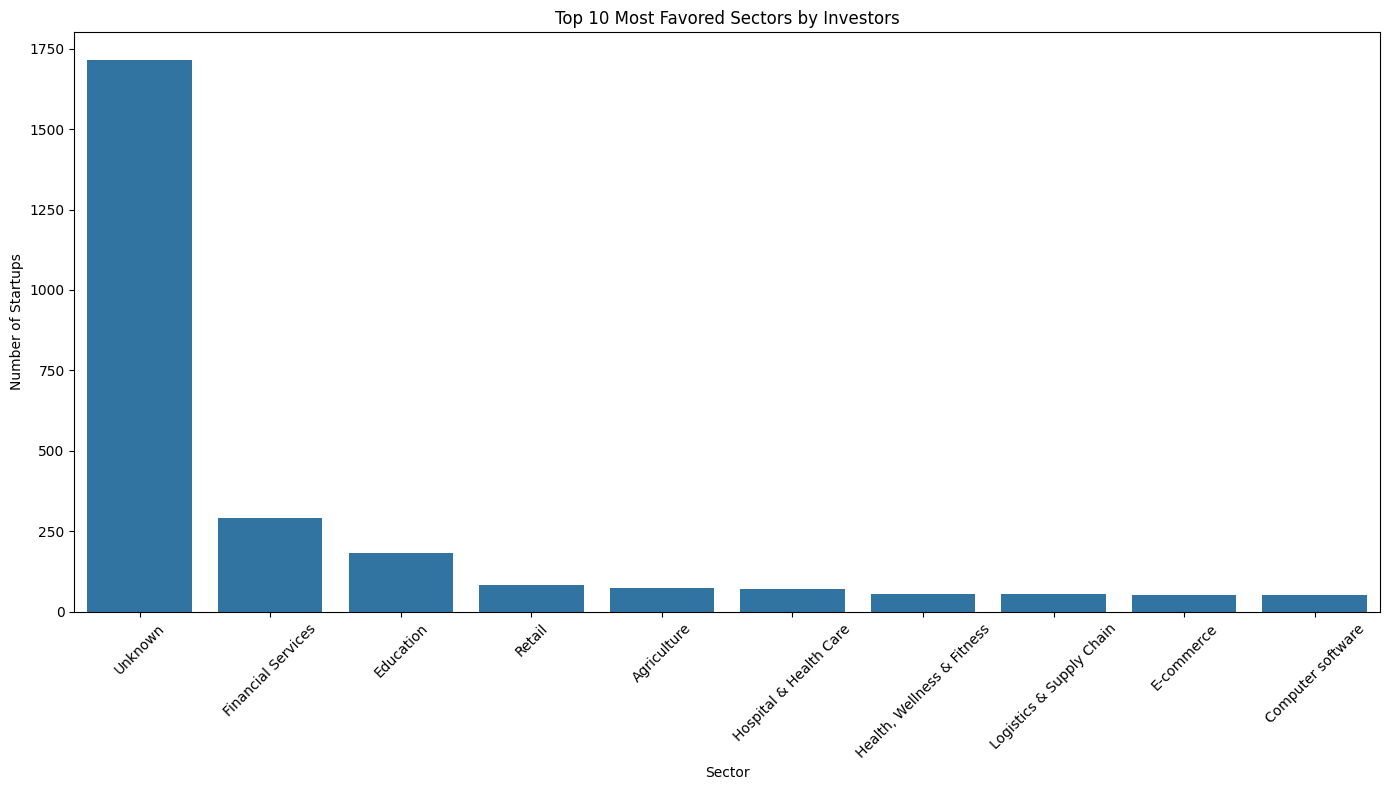

In [70]:
# Count the number of startups by sector
sector_counts = combined21_18['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Count']

# Filter to top 10 sectors
top_10_sectors = sector_counts.head(10)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_sectors, x='Sector', y='Count')
plt.title('Top 10 Most Favored Sectors by Investors')
plt.xlabel('Sector')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)  # Rotate x-axis labels readability
plt.tight_layout()
plt.show()


#### 5.What are the most common funding stages among indian startups?

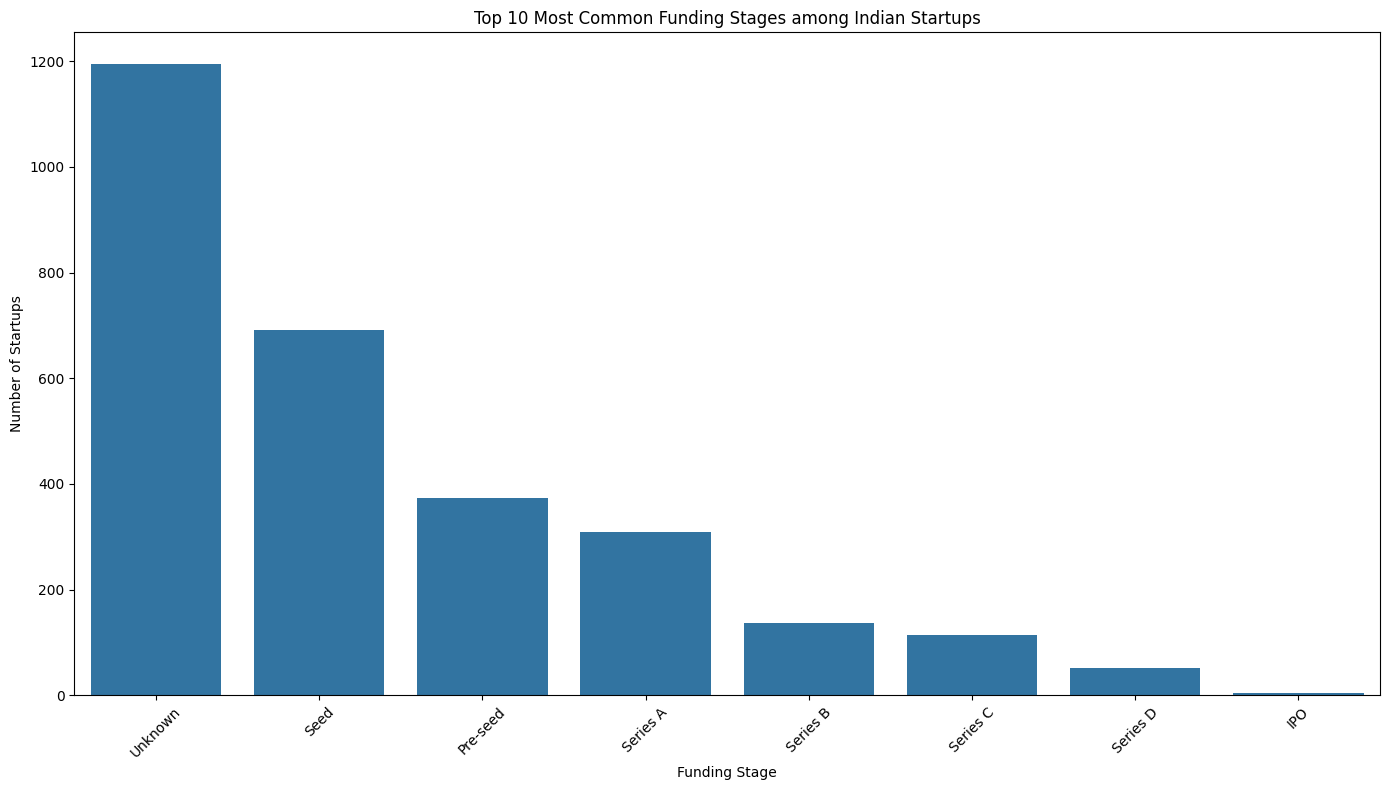

In [71]:
# Count the number of startups by funding stage
stage_counts = combined21_18['Stage'].value_counts().reset_index()
stage_counts.columns = ['Stage', 'Count']

# Filter to top 10 funding stages
top_10_stages = stage_counts.head(10)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_stages, x='Stage', y='Count')
plt.title('Top 10 Most Common Funding Stages among Indian Startups')
plt.xlabel('Funding Stage')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
